## Task details: https://phabricator.wikimedia.org/T367318

Data source for wikidata, commons, and wikipedia content growth is from wikistats:


Wikidata: https://stats.wikimedia.org/#/wikidata.org/content/pages-to-date/normal|table|2014-01-01~2024-06-01|page_type~content|monthly 

Wikipedia: https://stats.wikimedia.org/#/all-wikipedia-projects/content/pages-to-date/normal|table|2014-01-01~2024-06-01|page_type~content|monthly

Commons: https://stats.wikimedia.org/#/commons.wikimedia.org/content/pages-to-date/normal|table|2014-01-01~2024-06-01|page_type~content|monthly

Data for triples growth is queried from discovery.general_subgraph_metrics.

In [1]:
import wmfdata as wmf
import pandas as pd
from wikicharts import project_growth
from wikicharts import wikidata_triples

In [ ]:
# Code to generate triples_growth.csv

df = wmf.spark.run("""
    SELECT to_date(snapshot, 'yyyyMMdd') AS dt, total_triples
    FROM discovery.general_subgraph_metrics
    WHERE wiki = 'wikidata'
    ORDER BY dt ASC
""")


# Convert 'dt' column to datetime
df['dt'] = pd.to_datetime(df['dt'])

# Set 'dt' as the index and resample by month, taking only the last value of each month because the data is cumulative and we only need monthly totals.
df.set_index('dt', inplace=True)
monthly_last = df.resample('M').last().reset_index()

# Rename dt column to month
monthly_last = monthly_last.rename(columns = {'dt':'month'})
monthly_last['month'] = monthly_last['month'].dt.strftime('%Y-%m-01')


monthly_last.to_csv("wikicharts/resources/data/triples_growth.csv", index = False)

monthly_last

Generating Project_Growth chart...


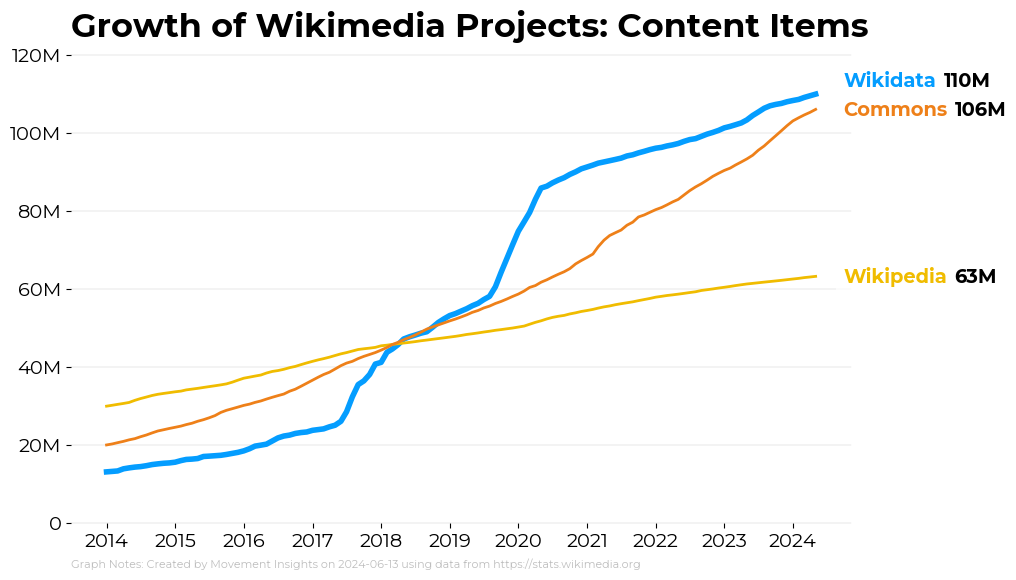

In [2]:
# Generate chart for wikidata, commons, and wikipedia growth of content items.
project_growth.main()

Generating Triples Growth chart...


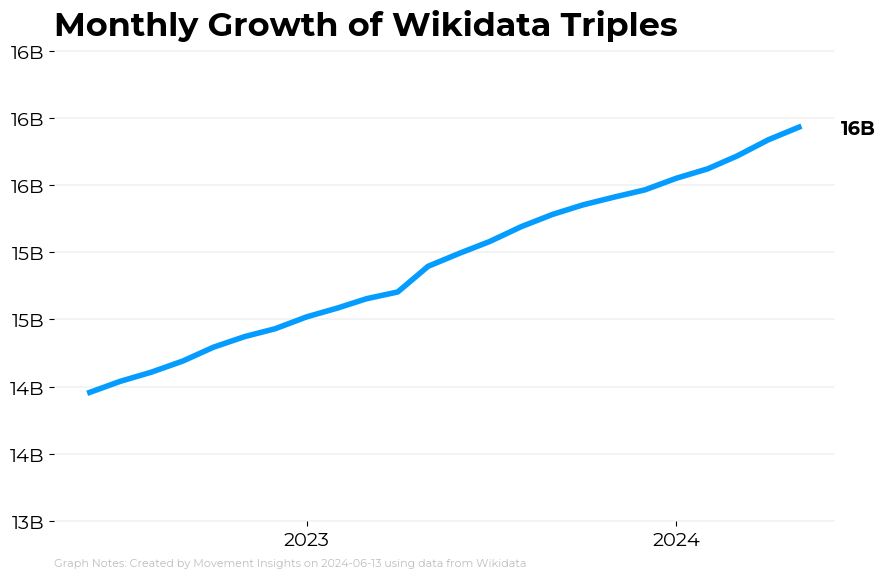

In [3]:
# Generate chart for wikidata triples.
wikidata_triples.main()